## covid-19 Data exploration from data set available by John hopkins CSSE

In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
#import plotly.graph_objects as go
#from fbprophet import Prophet
import pycountry
#import plotly.express as px

# importing time series datasets of confirmed, recovered and deaths

In [2]:
dir_path = '.'
df_confirmed = pd.read_csv('time_series_19-covid-Confirmed.csv')
df_recovered = pd.read_csv("time_series_19-covid-Recovered.csv")
df_deaths = pd.read_csv("time_series_19-covid-Deaths.csv")
df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)



In [3]:
df_confirmed.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,75,82,114,147,177,212,272,322,411,599
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,701,773,839,825,878,889,924,963,1007,1086
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,200,212,226,243,266,313,345,385,432,455
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,2
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,197,238,428,566,673,790,900,1030,1183,1306


In [4]:
df_confirmed=df_confirmed.groupby(["Country"]).sum()
df_confirmed=df_confirmed.drop(columns=['Lat','Long'])
df_recovered=df_recovered.groupby(["Country"]).sum()
df_recovered=df_recovered.drop(columns=['Lat','Long'])
df_deaths=df_deaths.groupby(["Country"]).sum()
df_deaths=df_deaths.drop(columns=['Lat','Long'])
df_confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,...,7,11,16,21,22,22,22,24,24,40
Albania,0,0,0,0,0,0,0,0,0,0,...,33,38,42,51,55,59,64,70,76,89
Algeria,0,0,0,0,0,0,0,0,0,0,...,26,37,48,54,60,74,87,90,139,201
Andorra,0,0,0,0,0,0,0,0,0,0,...,1,1,1,2,39,39,53,75,88,113
Angola,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,2


# importing latest total deaths, confirmed and recovered dataset

In [5]:
df = pd.read_csv('03-21-2020.csv',parse_dates=['Last Update'])
df.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)
df=df.groupby("Country")[['Confirmed', 'Deaths', 'Recovered']].sum().reset_index()


# extracting top 50 infected countries

In [6]:
top_affected_countries=df.sort_values(['Confirmed'],ascending=False)[:50]['Country'].values
top_affected_countries

array(['China', 'Italy', 'US', 'Spain', 'Germany', 'Iran', 'France',
       'Korea, South', 'Switzerland', 'United Kingdom', 'Netherlands',
       'Belgium', 'Austria', 'Norway', 'Sweden', 'Denmark', 'Portugal',
       'Canada', 'Malaysia', 'Australia', 'Brazil', 'Japan', 'Czechia',
       'Israel', 'Ireland', 'Pakistan', 'Cruise Ship', 'Luxembourg',
       'Turkey', 'Chile', 'Poland', 'Greece', 'Finland', 'Ecuador',
       'Qatar', 'Iceland', 'Indonesia', 'Singapore', 'Thailand',
       'Saudi Arabia', 'Slovenia', 'Romania', 'India', 'Peru',
       'Philippines', 'Estonia', 'Russia', 'Bahrain', 'Egypt',
       'South Africa'], dtype=object)

In [7]:
np.savetxt('top_affected_countries.txt',top_affected_countries, delimiter=" ", fmt="%s")

In [8]:
df_confirmed_top=df_confirmed.loc[top_affected_countries,:]
df_recovered_top=df_recovered.loc[top_affected_countries,:]
df_deaths_top=df_deaths.loc[top_affected_countries,:]
#df_confirmed_top.to_csv('confirmed-data-top50-countries.csv')
df_confirmed_top.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20
Country,,,,,,,,,,,,,,,,,,,,,
China,548,643,920,1406,2075,2877,5509,6087,8141,9802,...,80945,80977,81003,81033,81058,81102,81156,81250,81305,81397
Italy,0,0,0,0,0,0,0,0,0,2,...,17660,21157,24747,27980,31506,35713,41035,47021,53578,59138
US,1,1,2,2,5,5,5,5,5,7,...,2179,2727,3499,4632,6421,7783,13677,19100,25489,33272
Spain,0,0,0,0,0,0,0,0,0,0,...,5232,6391,7798,9942,11748,13910,17963,20410,25374,28768
Germany,0,0,0,0,0,1,4,4,4,5,...,3675,4585,5795,7272,9257,12327,15320,19848,22213,24873


In [9]:
df_active_top=df_confirmed_top-df_recovered_top - df_deaths_top

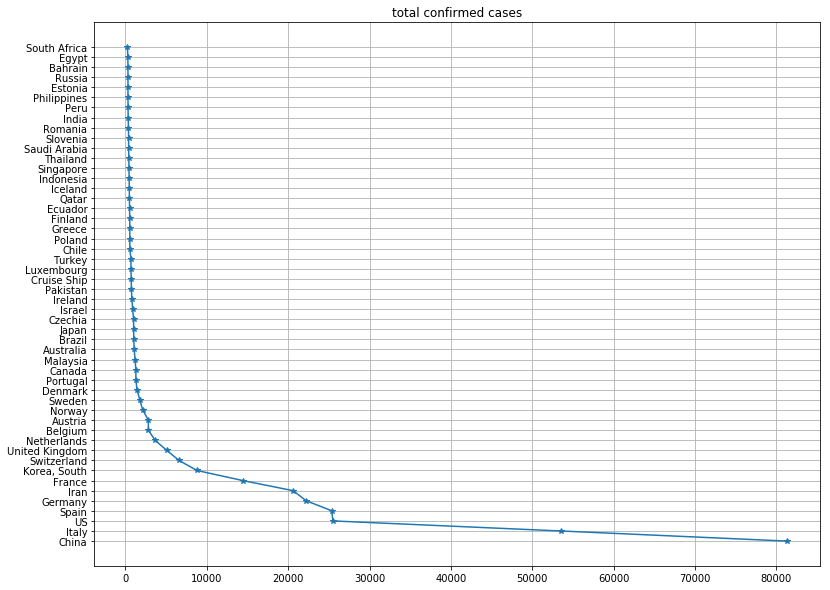

In [53]:
plt.figure(figsize=(13,10))
plt.title('total confirmed cases')
plt.plot(df_confirmed_top['3/21/20'].values,top_affected_countries,'*-')
#plt.xlim([9e4,0])
plt.grid()
#pd.plotting.table(data=df_confirmed_top['3/21/20'])

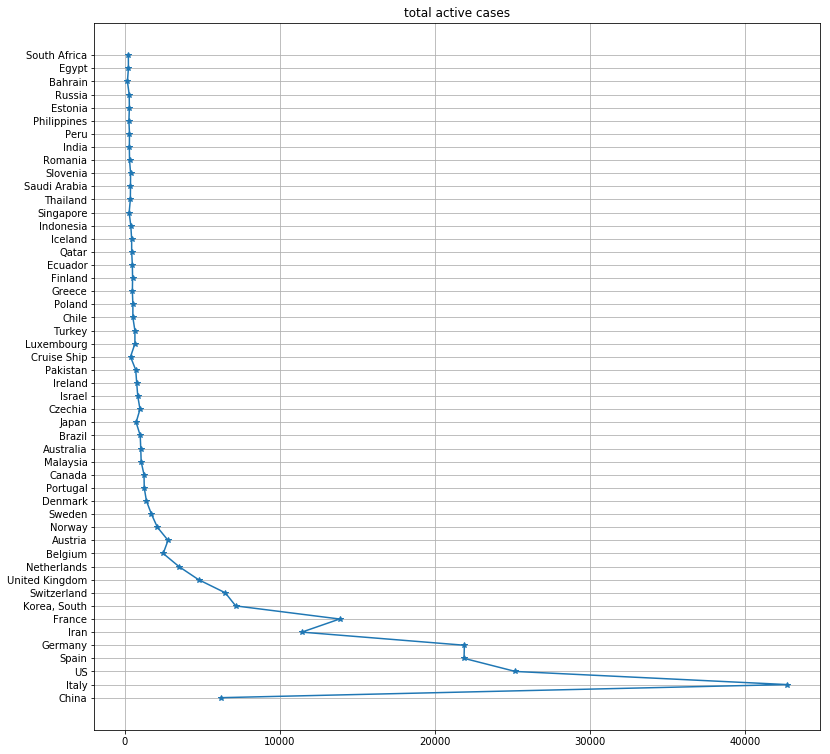

In [55]:
plt.figure(figsize=(13,13))
plt.title('total active cases')
plt.plot(df_active_top['3/21/20'].values,top_affected_countries,'*-')
plt.grid()

In [12]:
confirmed_mat=df_confirmed_top.as_matrix()
deaths_mat=df_deaths_top.as_matrix()
recovered_mat=df_recovered_top.as_matrix()
active_mat = df_active_top.as_matrix()

/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


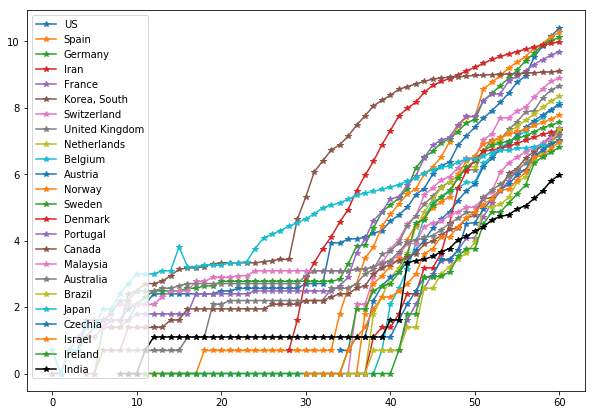

In [13]:
plt.figure(figsize=(10,7))
[plt.plot(np.log(confirmed_mat[i,:]),'*-',label=top_affected_countries[i]) for i in range(2,25)]
plt.plot(np.log(confirmed_mat[42,:]),'k*-',label=top_affected_countries[42])
plt.legend()

In [30]:
def plot_cases(confirmed_mat,thr=5,top_affected_countries=top_affected_countries):
    l=len(top_affected_countries)
    india_idx=np.where(top_affected_countries== 'India')[0][0]
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k*-',label=top_affected_countries[india_idx])
    for i in range(0,15):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[i,idx.T]),'k*-',label=top_affected_countries[india_idx])
    for i in range(15,28):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k*-',label=top_affected_countries[india_idx])
    for i in range(28,40):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()
    plt.figure(figsize=(10,10))
    for i in range(40,l):
        idx=np.where(confirmed_mat[i,:]>thr)[0]
        plt.plot(np.log(confirmed_mat[i,idx.T]),'*-',label=top_affected_countries[i])
    idx=np.where(confirmed_mat[india_idx,:]>thr)[0]
    plt.plot(np.log(confirmed_mat[india_idx,idx.T]),'k*-',label=top_affected_countries[india_idx])
    plt.xlabel('days(start from cases =' + str(thr) + ')')
    plt.ylabel('log # cases')
    plt.legend()

confirmed_cases


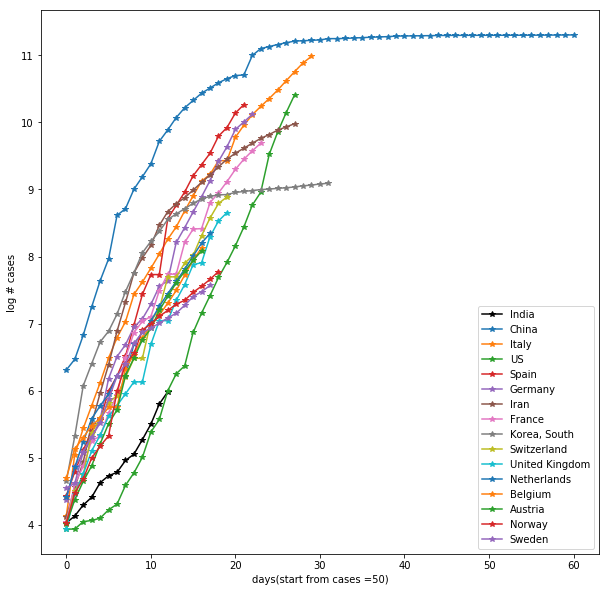

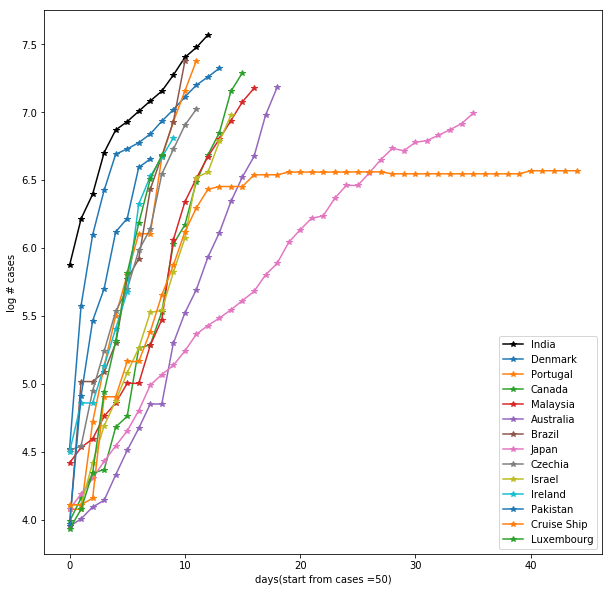

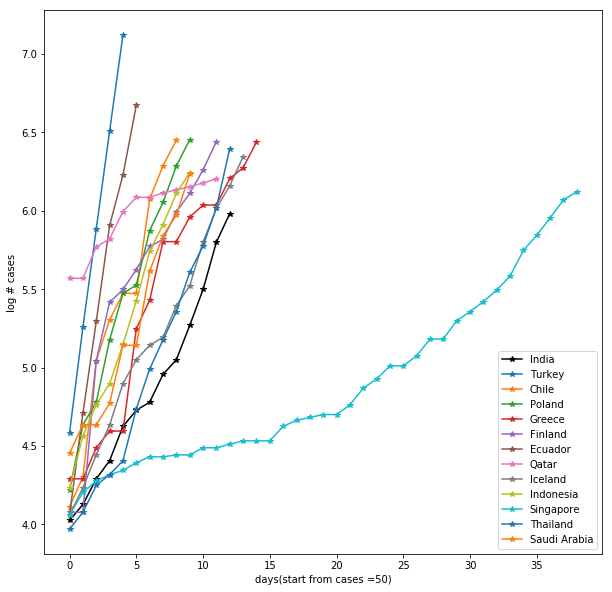

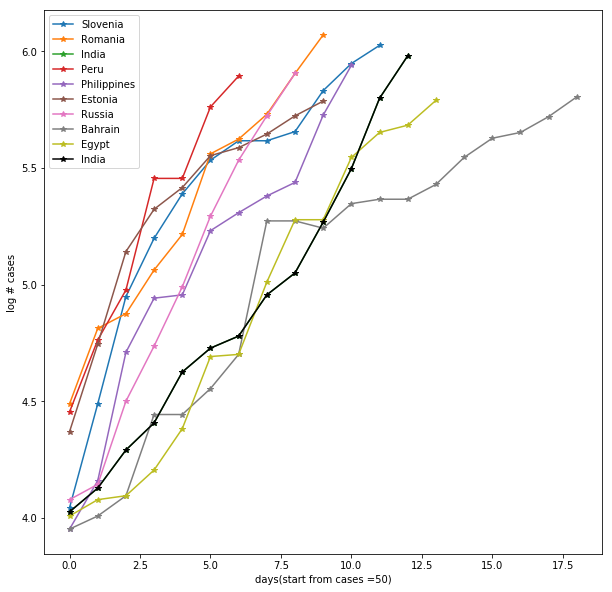

In [15]:
%matplotlib inline
print('confirmed_cases')
plot_cases(confirmed_mat,thr=50)

In [16]:
#print('active_cases')
#plot_cases(active_mat,thr=50)

In [17]:
#print('death_cases')
#plot_cases(deaths_mat,thr=1)

In [56]:
#print('recovered_cases')
#plot_cases(recovered_mat,thr=5)

# slope of log(#cases) v/s days: spread rate in logarithmic phase

In [19]:
def calc_slopes(confirmed_mat,thr=3,guess=1,extra=False):
    #slopes=np.zeros(50)
    fit_params = np.zeros([50,5])
    for i in range(50):
        idx=np.where(confirmed_mat[i,:]>=thr)[0]
        y = np.log(confirmed_mat[i,idx.T])
        if len(y)>0:
            x = np.arange(len(y))
            z, res, _, _, _ = np.polyfit(x, y, guess,full=True)
            #slopes[i]=z[0]
            fit_params[i,0]=z[0]
            fit_params[i,1]=z[1]
            fit_params[i,2]=idx[0]
            fit_params[i,3]= np.log(confirmed_mat[i,idx[0]])
            fit_params[i,4]=res                        
    return fit_params
    # p = np.poly1d(z)
    # fit = p(x)
  #  plt.figure()
  #  plt.hist(slopes,20,histtype='step')
  #  plt.xlabel('slope')
  #  print('mean,median = ',slopes.mean(),np.median(slopes))
  #  plt.figure(figsize=(30,10))
  #  plt.plot(slopes,'*-')
  #  plt.xticks(np.arange(0,50))
  #  plt.xlabel("Country")
  #  plt.ylabel("slope of log cases")
  #  plt.grid()
    

In [20]:
fit_params_confirmed=calc_slopes(confirmed_mat,thr=50)
fit_params_active=calc_slopes(active_mat,thr=50)

In [21]:
#confirmed cases 
def make_df_cases(fit_params_confirmed):
    confirmed_fit_df= pd.DataFrame()
    confirmed_fit_df['Country']=top_affected_countries
    confirmed_fit_df['slope(log cases)'] = fit_params_confirmed[:,0]
    confirmed_fit_df['start day'] = fit_params_confirmed[:,2].astype(int)
    confirmed_fit_df['start date']=df_confirmed_top.columns[confirmed_fit_df['start day']]
    confirmed_fit_df['intersecpt(log cases)'] = fit_params_confirmed[:,1]
    confirmed_fit_df['MSE fit'] = fit_params_confirmed[:,3]
    confirmed_fit_df=confirmed_fit_df.sort_values('slope(log cases)')
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'China']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Korea, South']
    confirmed_fit_df=confirmed_fit_df[confirmed_fit_df.Country != 'Cruise Ship']
    
    return confirmed_fit_df

In [22]:
confirmed_fit_df=make_df_cases(fit_params_confirmed)
confirmed_fit_df.to_csv(r'47_countries_confirmed_fit.csv', index = False)
confirmed_fit_df

,Country,slope(log cases),start day,start date,intersecpt(log cases),MSE fit
37,Singapore,0.046935,21,2/12/20,3.950137,3.912023
34,Qatar,0.059614,49,3/11/20,5.644132,5.568345
21,Japan,0.083322,25,2/16/20,4.319154,4.077537
47,Bahrain,0.104696,42,3/4/20,4.101918,3.951244
45,Estonia,0.139734,51,3/13/20,4.700326,4.369448
40,Slovenia,0.154480,49,3/11/20,4.508419,4.043051
48,Egypt,0.155600,47,3/9/20,3.874014,4.007333
42,India,0.157058,48,3/10/20,3.944755,4.025352
15,Denmark,0.158140,47,3/9/20,5.578451,4.521789
35,Iceland,0.166996,45,3/7/20,3.791739,3.912023


In [23]:
# active cases
#active_fit_df=make_df_cases(fit_params_active)
#active_fit_df.to_csv(r'47_countries_active_fit.csv', index = False)
#active_fit_df

## Future Plans:
Case studies on: Singapore, Japan, Qatar, Bahrain, Estonia for their low spread rate(slope)
 
Case studies on: Portugal, Pakistan, Luxembourg, Turkey, Ecuador for their high spread rate(slope)

Fit slopes v/s : population density, temperature, humidity, economy, medical facilities, shutdown call, transport bans

# y predictions assuming exponential growth phase

In [24]:
def y_pred(active_fit_df, t_len=65):
    for day in range(t_len):
        active_fit_df['exp MSE'] = np.exp(active_fit_df['MSE fit'])
        active_fit_df['pred_day ' + str(day)] = np.exp(active_fit_df['slope(log cases)']*day + active_fit_df['intersecpt(log cases)'])
    return active_fit_df

In [33]:
#active_fit_df_y=y_pred(active_fit_df)
#active_fit_df_y.to_csv(r'47_countries_active_fit_y.csv', index = False)
confirmed_fit_df_y=y_pred(confirmed_fit_df)
#confirmed_fit_df_y.to_csv(r'47_countries_confirmed_fit_y.csv', index = False)
#active_fit_df_y[active_fit_df_y.columns[7:]].as_matrix()
confirmed_fit_df_y

,Country,slope(log cases),start day,start date,intersecpt(log cases),MSE fit,exp MSE,pred_day 0,pred_day 1,pred_day 2,...,pred_day 55,pred_day 56,pred_day 57,pred_day 58,pred_day 59,pred_day 60,pred_day 61,pred_day 62,pred_day 63,pred_day 64
37,Singapore,0.046935,21,2/12/20,3.950137,3.912023,50.0,51.942462,54.438489,57.054459,...,6.864625e+02,7.194496e+02,7.540218e+02,7.902553e+02,8.282300e+02,8.680295e+02,9.097415e+02,9.534579e+02,9.992751e+02,1.047294e+03
34,Qatar,0.059614,49,3/11/20,5.644132,5.568345,262.0,282.628073,299.988961,318.416270,...,7.501775e+03,7.962583e+03,8.451698e+03,8.970857e+03,9.521907e+03,1.010681e+04,1.072763e+04,1.138659e+04,1.208603e+04,1.282844e+04
21,Japan,0.083322,25,2/16/20,4.319154,4.077537,59.0,75.125010,81.652717,88.747624,...,7.345473e+03,7.983730e+03,8.677447e+03,9.431441e+03,1.025095e+04,1.114167e+04,1.210978e+04,1.316202e+04,1.430568e+04,1.554872e+04
47,Bahrain,0.104696,42,3/4/20,4.101918,3.951244,52.0,60.456146,67.128874,74.538091,...,1.915271e+04,2.126666e+04,2.361392e+04,2.622026e+04,2.911427e+04,3.232770e+04,3.589581e+04,3.985774e+04,4.425696e+04,4.914173e+04
45,Estonia,0.139734,51,3/13/20,4.700326,4.369448,79.0,109.983043,126.476964,145.444443,...,2.393532e+05,2.752485e+05,3.165270e+05,3.639958e+05,4.185835e+05,4.813576e+05,5.535457e+05,6.365598e+05,7.320233e+05,8.418033e+05
40,Slovenia,0.154480,49,3/11/20,4.508419,4.043051,57.0,90.778158,105.942765,123.640638,...,4.445573e+05,5.188212e+05,6.054909e+05,7.066390e+05,8.246839e+05,9.624484e+05,1.123227e+06,1.310863e+06,1.529844e+06,1.785407e+06
48,Egypt,0.155600,47,3/9/20,3.874014,4.007333,55.0,48.135201,56.239210,65.707604,...,2.507066e+05,2.929154e+05,3.422305e+05,3.998482e+05,4.671663e+05,5.458181e+05,6.377117e+05,7.450763e+05,8.705169e+05,1.017076e+06
42,India,0.157058,48,3/10/20,3.944755,4.025352,56.0,51.663667,60.449793,70.730121,...,2.915496e+05,3.411316e+05,3.991458e+05,4.670261e+05,5.464504e+05,6.393819e+05,7.481177e+05,8.753455e+05,1.024210e+06,1.198391e+06
15,Denmark,0.158140,47,3/9/20,5.578451,4.521789,92.0,264.661255,310.005694,363.118999,...,1.585083e+06,1.856655e+06,2.174756e+06,2.547358e+06,2.983797e+06,3.495011e+06,4.093811e+06,4.795204e+06,5.616767e+06,6.579089e+06
35,Iceland,0.166996,45,3/7/20,3.791739,3.912023,50.0,44.333439,52.391046,61.913125,...,4.321576e+05,5.107022e+05,6.035224e+05,7.132127e+05,8.428392e+05,9.960253e+05,1.177053e+06,1.390982e+06,1.643794e+06,1.942553e+06


In [32]:
#confirmed_mat_y=confirmed_fit_df_y[confirmed_fit_df_y.columns[7:]].as_matrix()
#plot_cases(confirmed_mat_y,thr=0,top_affected_countries=confirmed_fit_df_y['Country'].values)

/home/srashti/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.
